# Estudio de delitos y variables explicativas 2015 - 2020

El siguiente estudio busca la relación entre variables como la desocupación, edad, producto interno bruto, 	ingreso	y pobreza, y lñas variables delictivas como el homicidio, el robo a casa habitación, robo a transeúnte en vía pública, robo de vehículo y extorción, a nivel estatal de 2015 a 2020.

Para los delitos se utilizaron las carpetas de investigación reportadas en la base del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública.

### Descargar librerías

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl




### Leer Archivos

In [2]:
base = pd.read_csv('base_final.csv')
base.head()

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
0,2015,1,Aguascalientes,211,2525,1754,1995,39,15.84,189.59,...,4.577627,255649,211782,175356,296621,1331825,198220.6406,207024.3438,2.088839293,31.57929993
1,2016,1,Aguascalientes,233,2459,1353,3110,70,17.19,181.43,...,3.973306,258733,217183,178187,308198,1355321,211672.4688,203879,2.303939819,28.2192173
2,2017,1,Aguascalientes,258,3327,1949,3624,121,18.75,241.83,...,3.599153,260495,222453,180840,320035,1375782,216705.5625,206759.8281,2.182645082,25.98674774
3,2018,1,Aguascalientes,283,3355,2216,3309,138,20.28,240.36,...,3.626284,261963,227600,183553,331996,1395794,224807.4688,222261,1.165585518,26.1829586
4,2019,1,Aguascalientes,269,2817,1780,2399,116,19.00,199.02,...,3.532177,263225,232527,186443,344052,1415421,223622.4844,.,.,.


In [3]:
hom= base[['ao','clave_ent', 'edo', 'homicidio', 'tasa_hom']]

In [4]:
hom_pivot= pd.pivot_table(hom, values=['homicidio'], index=['ao'],aggfunc=np.sum)
hom_xhabs_pivot= pd.pivot_table(hom, values=['tasa_hom'], index=['ao'],aggfunc=np.sum)
hom_y_xhabs= pd.pivot_table(hom, values=['homicidio', 'tasa_hom'], index=['ao'],aggfunc=np.sum)
hom_y_xhabs

,homicidio,tasa_hom
ao,,
2015,31192,865.14
2016,35324,996.92
2017,41327,1201.00
2018,44490,1218.51
2019,44599,1214.15


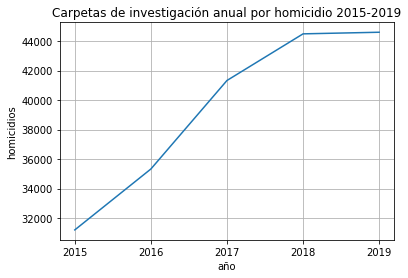

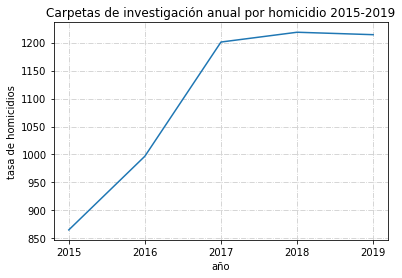

In [5]:
plt.plot(hom_pivot)
plt.title("Carpetas de investigación anual por homicidio 2015-2019")
plt.ylabel('homicidios')
plt.xlabel('año')
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
pl.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

plt.plot(hom_xhabs_pivot)
plt.title("Carpetas de investigación anual por homicidio 2015-2019")
plt.ylabel('tasa de homicidios')
plt.xlabel('año')
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
pl.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()


Año con año se ha visto un incrememto en el número de homicidios pero si se controla por población, 2019 presenta una reducción en comparación con 2018.

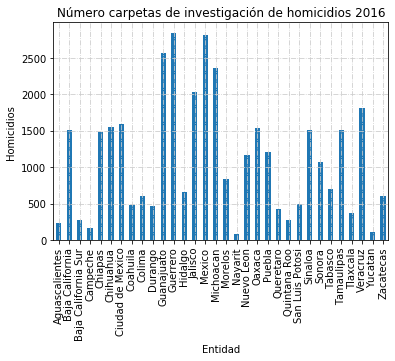

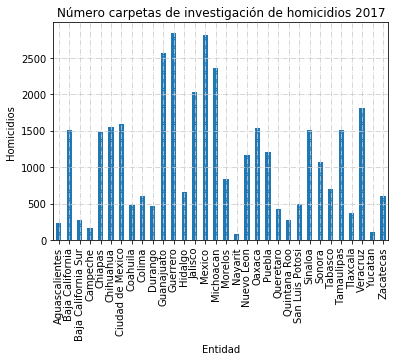

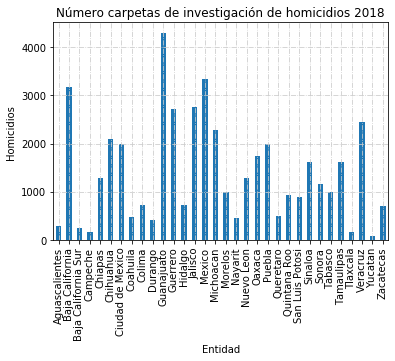

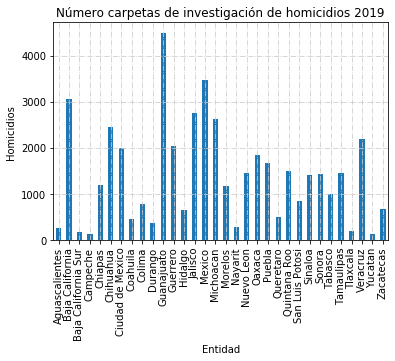

In [6]:
plot2016 = hom[hom.ao == 2016].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2016")
plt.grid(True)
plt.show()
plot2017 = hom[hom.ao == 2016].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2017")
plt.grid(True)
plt.show()
plot2018 = hom[hom.ao == 2018].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2018")
plt.grid(True)
plt.show()
plot2019 = hom[hom.ao == 2019].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2019")
plt.grid(True)
plt.show()

In [7]:
hom_por_ent= pd.pivot_table(hom, values=['tasa_hom'], index=['ao'], columns=['edo'],aggfunc=np.sum)
hom_por_ent

tasa_hom                                                       \
edo  Aguascalientes Baja California Baja California Sur Campeche Chiapas   
ao                                                                         
2015          15.84           36.30               27.92    12.87   29.24   
2016          17.19           44.16               36.91    17.89   27.44   
2017          18.75           70.17               91.88    14.94   24.69   
2018          20.28           89.97               31.64    16.02   22.99   
2019          19.00           85.59               21.32    13.62   21.00   

                                                          ...               \
edo  Chihuahua Ciudad de Mexico Coahuila  Colima Durango  ... Quintana Roo   
ao                                                        ...                
2015     35.56            17.50    17.83   30.76   27.73  ...        37.45   
2016     42.39            17.61    15.61   81.26   25.75  ...        17.76   
2017     51.72            20.07    15.42  105.54   24.24  ...        30.96   
2018     55.98            21.92    15.33   95.35   22.22  ...        56.89   
2019     65.04            22.12    14.14  100.80   19.70  ...        89.05   

                                                                          \
edo  San Luis Potosi Sinaloa Sonora Tabasco Tamaulipas Tlaxcala Veracruz   
ao                                                                         
2015           14.21   46.55  34.08   28.23      39.57    24.94    12.23   
2016           17.98   49.71  36.54   28.45      42.90    27.62    21.85   
2017           25.40   59.76  38.79   35.71      45.51    23.96    32.09   
2018           31.82   51.79  38.57   39.79      44.76    12.76    28.92   
2019           29.97   44.94  46.78   39.15      40.13    14.15    25.74   

                        
edo  Yucatan Zacatecas  
ao                      
2015    4.89     22.29  
2016    5.10     37.67  
2017    3.90     42.34  
2018    3.99     42.62  
2019    5.95     40.25  

[5 rows x 32 columns]

In [8]:
hom_por_ao= pd.pivot_table(hom, values=['tasa_hom'], index=['edo'], columns=['ao'],aggfunc=np.sum)
hom_por_ao

tasa_hom                              
ao                      2015   2016    2017   2018    2019
edo                                                       
Aguascalientes         15.84  17.19   18.75  20.28   19.00
Baja California        36.30  44.16   70.17  89.97   85.59
Baja California Sur    27.92  36.91   91.88  31.64   21.32
Campeche               12.87  17.89   14.94  16.02   13.62
Chiapas                29.24  27.44   24.69  22.99   21.00
Chihuahua              35.56  42.39   51.72  55.98   65.04
Ciudad de Mexico       17.50  17.61   20.07  21.92   22.12
Coahuila               17.83  15.61   15.42  15.33   14.14
Colima                 30.76  81.26  105.54  95.35  100.80
Durango                27.73  25.75   24.24  22.22   19.70
Guanajuato             40.43  42.88   55.56  70.26   72.79
Guerrero               76.08  79.06   79.35  74.83   55.76
Hidalgo                22.45  22.22   23.51  24.32   21.18
Jalisco                21.80  25.16   25.88  33.54   33.15
Mexico                 17.92  16.83   19.22  19.53   20.17
Michoacan              43.94  50.29   47.57  47.84   54.78
Morelos                44.08  42.61   41.86  49.99   57.45
Nayarit                12.30   6.92   23.43  35.61   21.25
Nuevo Leon             18.98  22.12   20.45  23.54   26.28
Oaxaca                 10.35  38.08   40.81  42.54   44.97
Puebla                 19.22  19.00   25.68  30.61   25.42
Queretaro              21.60  19.96   21.84  22.29   22.51
Quintana Roo           37.45  17.76   30.96  56.89   89.05
San Luis Potosi        14.21  17.98   25.40  31.82   29.97
Sinaloa                46.55  49.71   59.76  51.79   44.94
Sonora                 34.08  36.54   38.79  38.57   46.78
Tabasco                28.23  28.45   35.71  39.79   39.15
Tamaulipas             39.57  42.90   45.51  44.76   40.13
Tlaxcala               24.94  27.62   23.96  12.76   14.15
Veracruz               12.23  21.85   32.09  28.92   25.74
Yucatan                 4.89   5.10    3.90   3.99    5.95
Zacatecas              22.29  37.67   42.34  42.62   40.25

<Figure size 72000x36000 with 0 Axes>

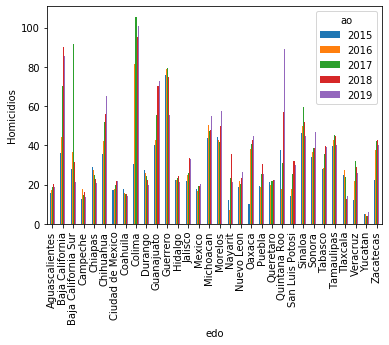

In [9]:
plt.figure(figsize=(1000,500))
pd.pivot_table(hom, index= 'edo', columns= 'ao', values= "tasa_hom").plot(kind= 'bar')
plt.ylabel("Homicidios")
plt.show()

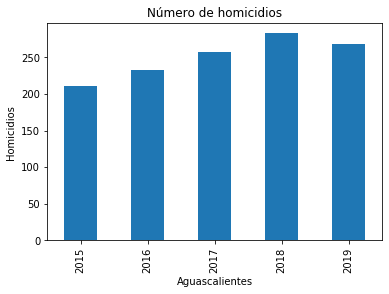

/Users/soto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


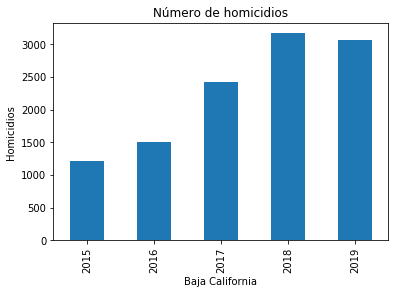

/Users/soto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


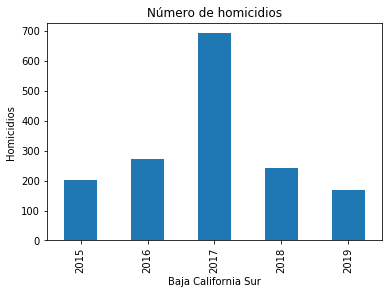

/Users/soto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [17]:


ags = hom[hom.edo == 'Aguascalientes'].groupby("ao")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Aguascalientes")
plt.title("Número de homicidios")
plt.show()
ags = fig.add_subplot(1, 3, 1)


bc = hom[hom.edo == 'Baja California'].groupby("ao")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Baja California")
plt.title("Número de homicidios")
plt.show()
bc = fig.add_subplot(1, 3, 2)


bcs = hom[hom.edo == 'Baja California Sur'].groupby("ao")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Baja California Sur")
plt.title("Número de homicidios")
plt.show()
bcs = fig.add_subplot(1, 3, 3)


